In [1]:
# while PCA is flexible fast and easily interpretable it does not perform
# so well when there are nonlinear relationships within the data

In [2]:
# Manifold learning is a class of unsupervised estimators that seeks to describe the dataset
# as low dimensional manifolds embedded in high dimensional spaces

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np

In [4]:
# MANIFOLD LEARNING : HELLO

In [5]:
def make_hello(N=1000, rseed=42):
    # Make a plot with hello text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)

    # open this png and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    x = rng.rand(4*N, 2)
    i, j = (x*data.shape).astype(int).T
    mask = (data[i, j] < 1)
    x = x[mask]
    x[:, 0]*=(data.shape[0]/data.shape[1])
    x = x[:N]
    return x[np.argsort(x[:, 0])]

C:\Users\Family\AppData\Local\Temp\ipykernel_17368\1256603593.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize = dict(c=x[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))


(-0.09759837474609756,
 4.129761441745652,
 0.043259321063934555,
 0.999098744761459)

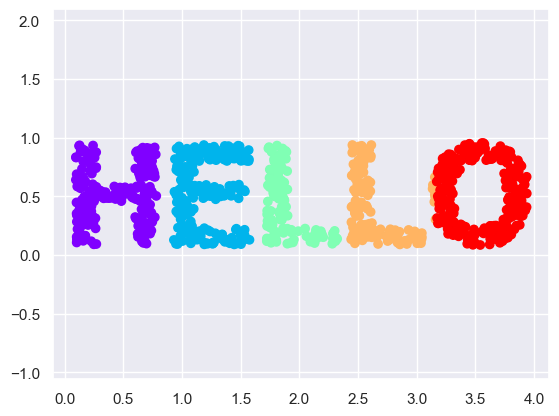

In [6]:
x = make_hello(1000)
colorize = dict(c=x[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(x[:, 0], x[:, 1], **colorize)
plt.axis('equal')

In [7]:
# The output is 2D and consists of points drawn in the shape of the word 'HELLO'

In [8]:
# MULTIDIMENSIONAL SCALING : MDS

In [9]:
# we can scale, shrink, rotate the data but it will still fundamentally be same

(4.607678232445618, 8.746682208062794, 5.035821528466808, 7.243272110369881)

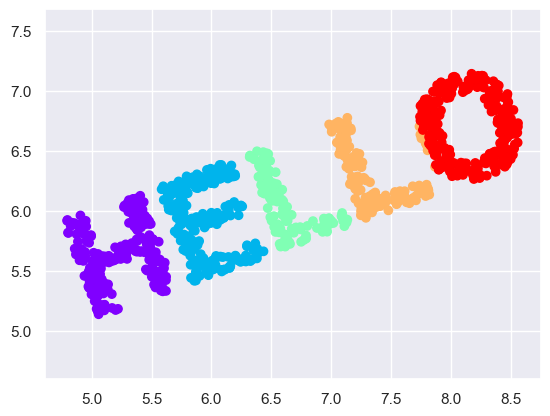

In [10]:
def rotate(x, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(x, R)

x2 = rotate(x, 20) + 5
plt.scatter(x2[:, 0], x2[:, 1], **colorize)
plt.axis('equal')

In [11]:
# This tells us that x and y values are not necessarily fundamental to the relationships in the data
# what is fundamental in this is the distance between each point
# and other points in the dataset

In [12]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(x)
D.shape

(1000, 1000)

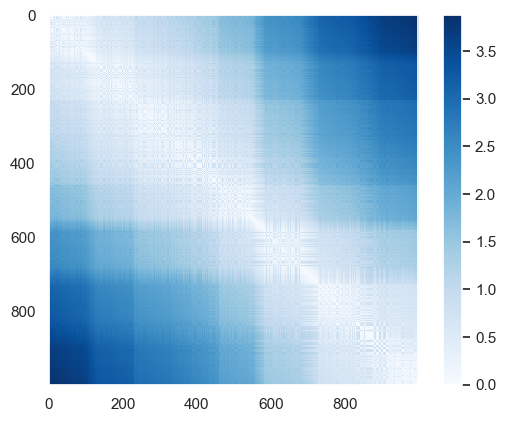

In [13]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

In [14]:
# visualization of the pairwise distances betweem the points

In [15]:
D2 = pairwise_distances(x2)
np.allclose(D, D2)

True

In [16]:
# Let's see how it works for our distance matrix, using the precomputed dissimilarity  to specify that
# we are passing a distance matrix

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-1.064777958160055, 0.9987369762605118, -2.07925671453261, 2.126752999284894)

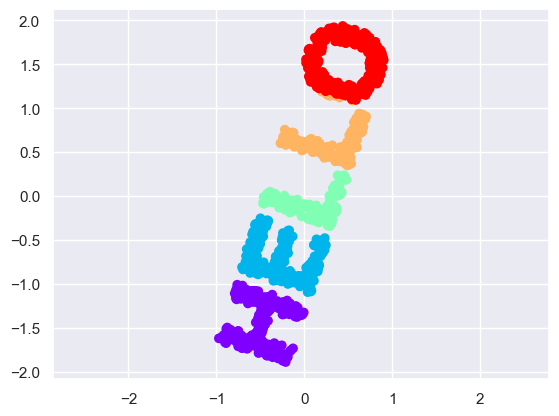

In [17]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')

In [18]:
# fig: an MDS embedding computed from the pairwise distances

In [19]:
# The MDS algorithm recovers one of the possible two-dimensional coordinate representations of our data, using
# only NxN ditance matrix describing the relationship between the data points

In [20]:
# MDS AS MANIFOLD LEARNING:

In [21]:
# The usefulness of this becomes more apparent when we consider the fact that distance
# matrices can be computed from data in any dimension
# lets project it on 3d instead of 2d


In [22]:
def random_projection(x, dimension=3, rseed=42):
    assert dimension >= x.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, v = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(x, v[:x.shape[1]])

x3 = random_projection(x, 3)
x3.shape

(1000, 3)

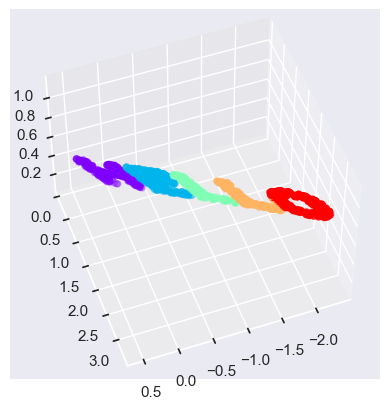

In [23]:
# Let's visualize these points
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(x3[:, 0], x3[:, 1], x3[:, 2], **colorize)
ax.view_init(azim=70, elev=50)

In [24]:
# We can now ask MDS estimator to input this 3D data, compute the distance matrix
# and then determine the optimal 2D embedding for distance matrix
# The result recovers a representation of original data


c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-1.0647779581600694,
 0.998736976260511,
 -2.079256714532604,
 2.1267529992848924)

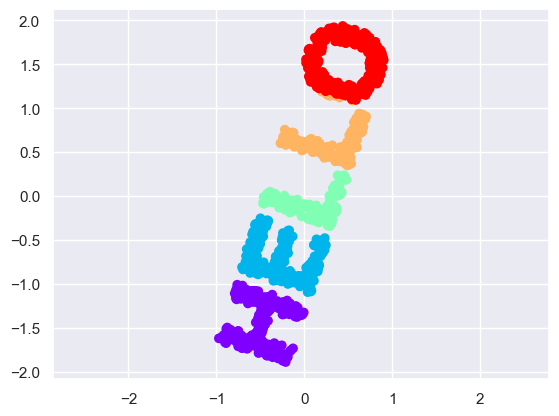

In [25]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(x3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

In [26]:
# NONLINEAR EMBEDDINGS : WHERE MDS FAILS

In [27]:
# Consider the following embedding, which takes the input and contorts it into an S shape in 3D

In [32]:
def make_hello_s_curve(x):
    t = (x[:, 0] - 2)*0.75*np.pi
    x1 = np.sin(t)
    y = x[:,1]
    z = np.sign(t) * (np.cos(t)-1)
    return np.vstack((x1, y, z)).T

xs = make_hello_s_curve(x)

In [33]:
# This is also 3D data but we can see that embedding is much more complicated

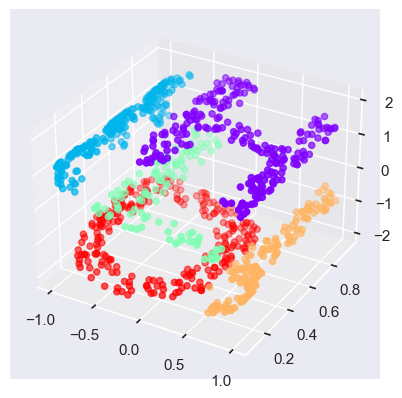

In [34]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(xs[:, 0], xs[:, 1], xs[:, 2], **colorize)

In [35]:
# The fundamental relationships between the data points are still there, but this time
# the data has been transformed in a non linear way: it has been wrapped into the shape of S

In [36]:
# If we try a simple MDS algorithm on this data , it is not able to unwrap this
# nonlinear embedding, and we lose track of the fundamental relationships
# in the embedded manifold

c:\Users\Family\DS_PRACTICE\ML_MODELS\venv_mlmodels\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-2.2575566208928204,
 2.1266575048280236,
 -1.700085773594125,
 1.5129421448595446)

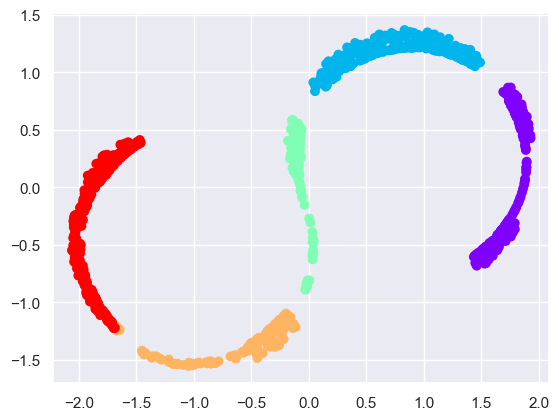

In [37]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(xs)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal')

In [38]:
# The MDS algorithm applied to the nonlinear data; it fails to recover the underlying structure

In [39]:
# NONLINEAR MANIFOLDS : LOCALLY LINEAR EMBEDDING

In [40]:
# LLE comes in a number of flavours, here we will use the manifold LLE algorithm
# to recover the embedded 2D manifold. In general modified LLE
# does better than other flavours of the algorithm at recovering well-defined manifolds with very 
# little distortion

(0.15, -0.15)

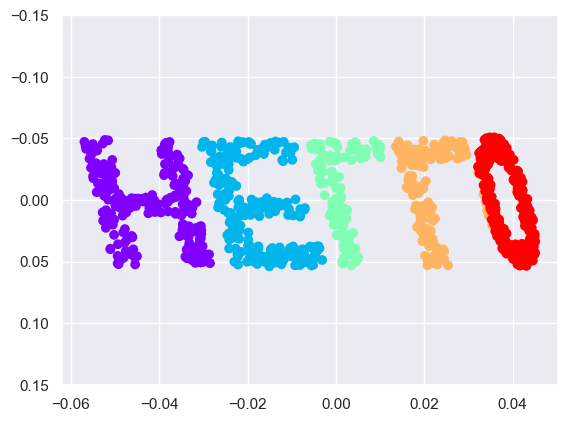

In [45]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
out = model.fit_transform(xs)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

In [43]:
# Locally linear embedding can recover the underlying data from a non-linear embedded input